In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random

In [2]:
dados = pd.read_csv('dados/exames.csv')
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

valores_exames = dados.drop(columns = ['id', 'diagnostico', 'exame_33'])
diagnostico = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)


classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print('Valor da acurácia das Árvores é de {:.2f}%'.format(classificador.score(teste_x, teste_y)*100))


dummy = DummyClassifier(strategy= 'most_frequent')
dummy.fit(treino_x, treino_y)
print('Valor da acurácia do Dummy é de {:.2f}%'.format(dummy.score(teste_x, teste_y)*100))

Valor da acurácia das Árvores é de 92.40%
Valor da acurácia do Dummy é de 66.67%


In [4]:
dados_plot = pd.concat([diagnostico, valores_exames], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


<AxesSubplot:xlabel='exames', ylabel='valores'>

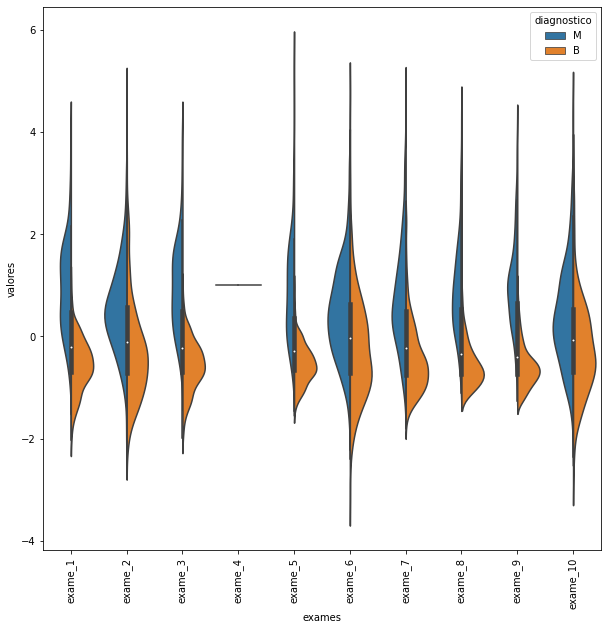

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_v2 = padronizador.transform(valores_exames)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')


plt.figure(figsize=(10, 10))
plt.xticks(rotation = 90)

sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', split = True, data = dados_plot)



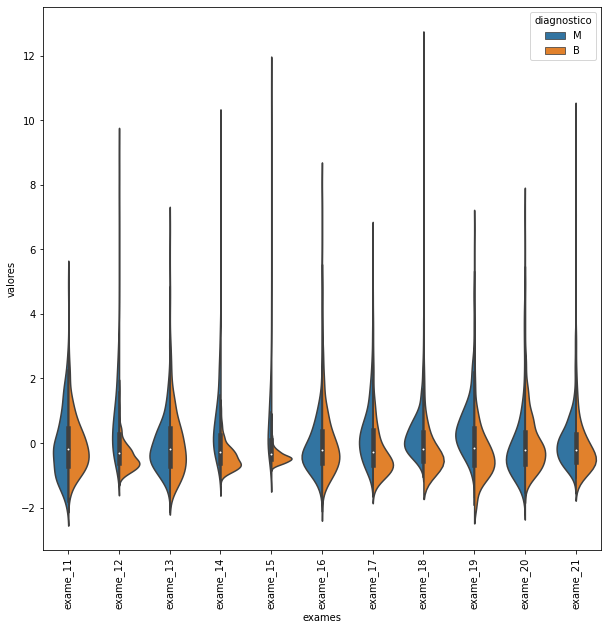

In [6]:
def grafico_violino(valores, inicio, fim):
    
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(10, 10))
    plt.xticks(rotation = 90)

    sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', split = True, data = dados_plot)
    
grafico_violino(valores_exames_v2, 10, 21)

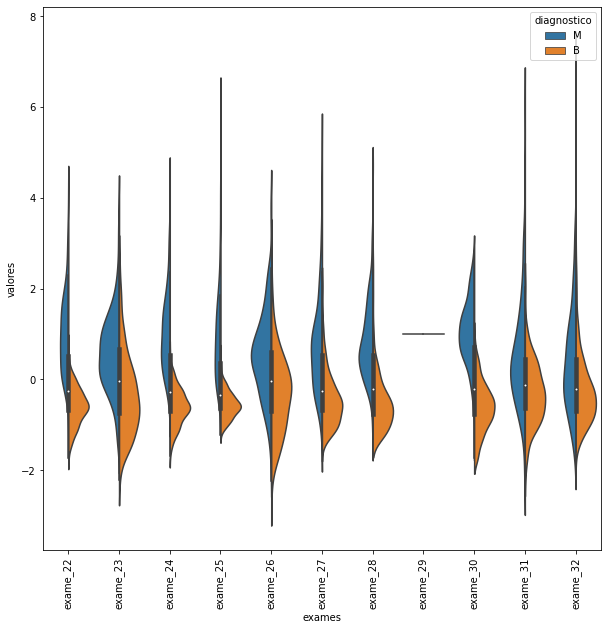

In [7]:
grafico_violino(valores_exames_v2, 21, 32)

In [8]:
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_29', 'exame_4'])

def classificar(valores):
    
    SEED = 123143
    random.seed(SEED)
    
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print('Valor da acurácia das Árvores é de {:.2f}%'.format(classificador.score(teste_x, teste_y)*100))

In [9]:
classificar(valores_exames_v3)

Valor da acurácia das Árvores é de 91.81%


<AxesSubplot:>

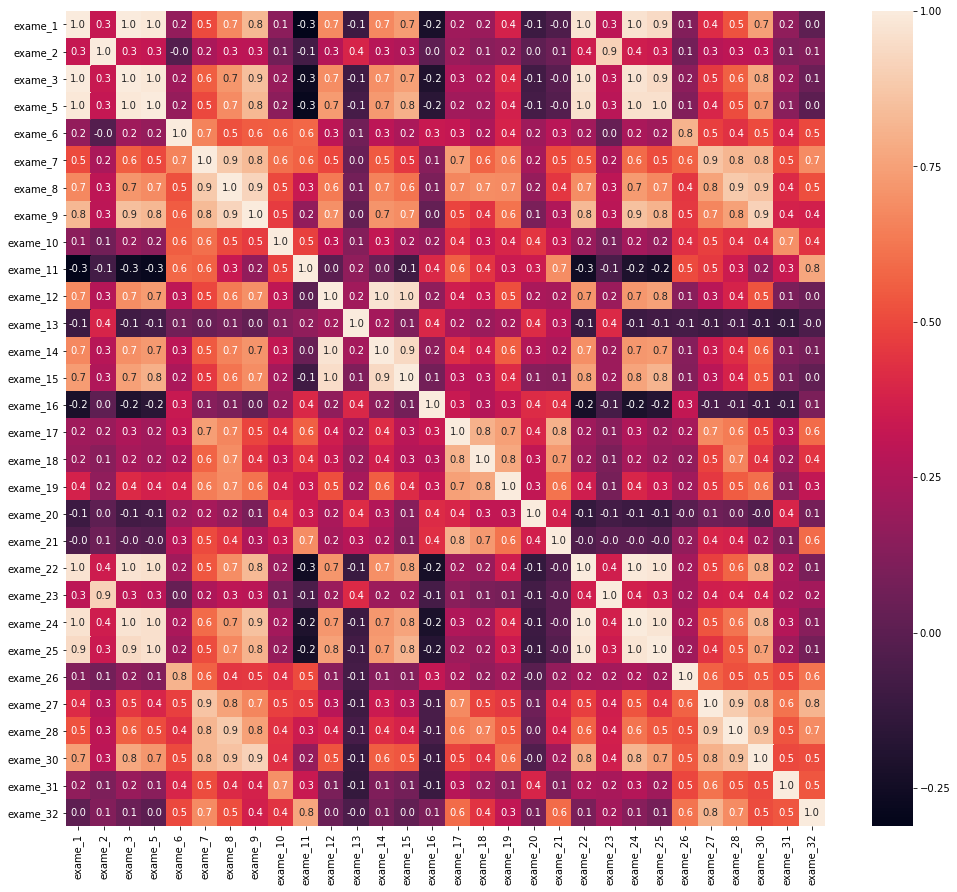

In [10]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize = (17,15))

sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

In [11]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [13]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [14]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
classificar(valores_exames_v4)

Valor da acurácia das Árvores é de 93.57%


In [16]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
classificar(valores_exames_v5)

Valor da acurácia das Árvores é de 92.98%


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_melhores = SelectKBest(chi2, k = 5)

In [18]:
valores_exames_v6 = valores_exames.drop(columns=(['exame_4', 'exame_29', 'exame_3', 'exame_24']))

In [19]:
SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_melhores.fit(treino_x, treino_y)
treino_kbest = selecionar_melhores.transform(treino_x)
teste_kbest = selecionar_melhores.transform(teste_x)

In [20]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_kbest, treino_y)

print('Valor da acurácia das Árvores é de {:.2f}%'.format(classificador.score(teste_kbest, teste_y)*100))

Valor da acurácia das Árvores é de 94.74%


[Text(0.5, 65.5, 'Predição'), Text(83.5, 0.5, 'Real')]

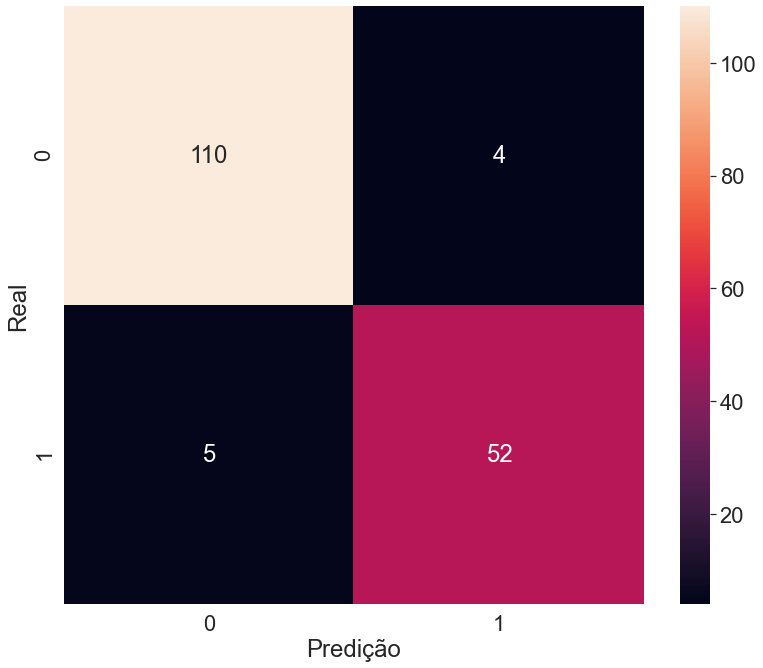

In [23]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

plt.figure(figsize = (13,11))

sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel='Real')

# RFE

In [28]:
from sklearn.feature_selection import RFE

SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_rfe, treino_y)

print('Valor da acurácia das Árvores é de {:.2f}%'.format(classificador.score(teste_rfe, teste_y)*100))

Valor da acurácia das Árvores é de 92.40%


[Text(0.5, 65.5, 'Predição'), Text(83.5, 0.5, 'Real')]

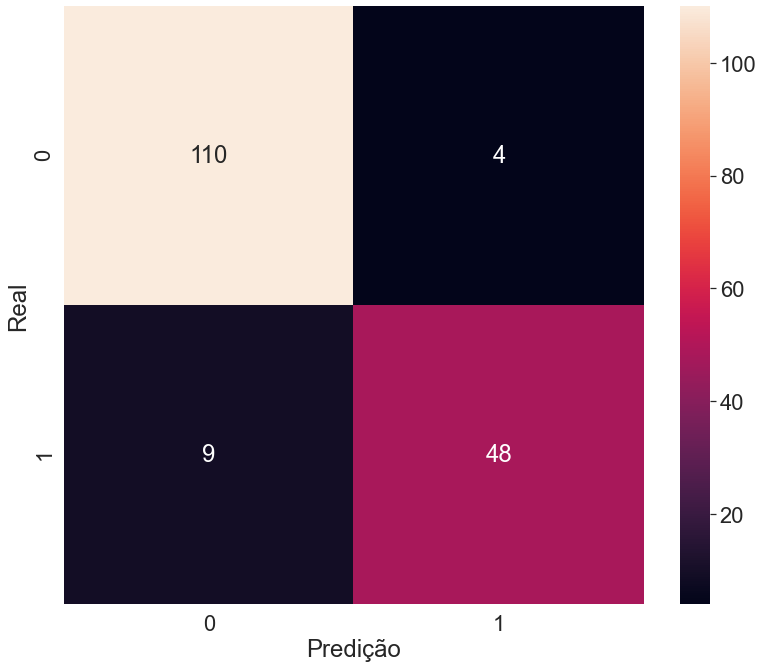

In [29]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize = (13,11))

sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel='Real')

In [31]:
from sklearn.feature_selection import RFECV

SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring = 'accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_rfecv, treino_y)

print('Valor da acurácia das Árvores é de {:.2f}%'.format(classificador.score(teste_rfecv, teste_y)*100))

Valor da acurácia das Árvores é de 93.57%


[Text(0.5, 65.5, 'Predição'), Text(83.5, 0.5, 'Real')]

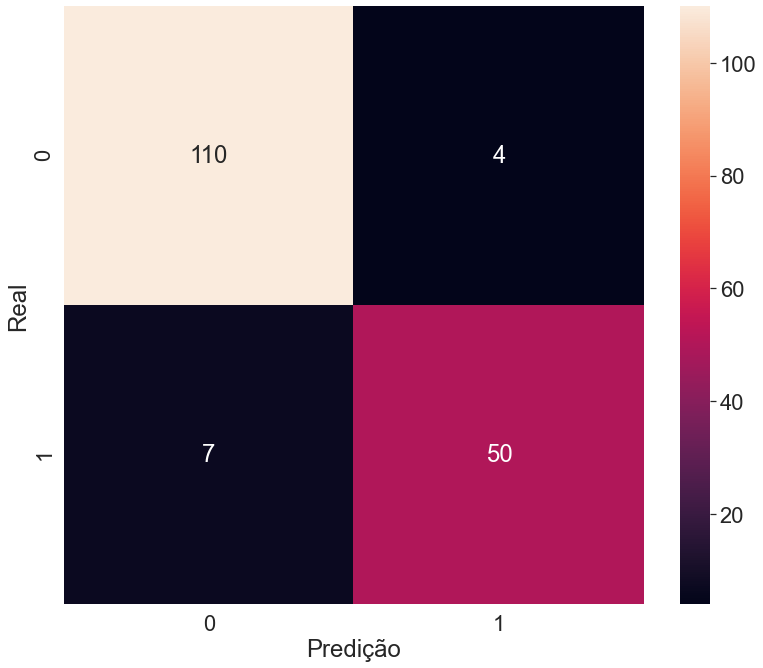

In [32]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

plt.figure(figsize = (13,11))

sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel='Real')

In [35]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

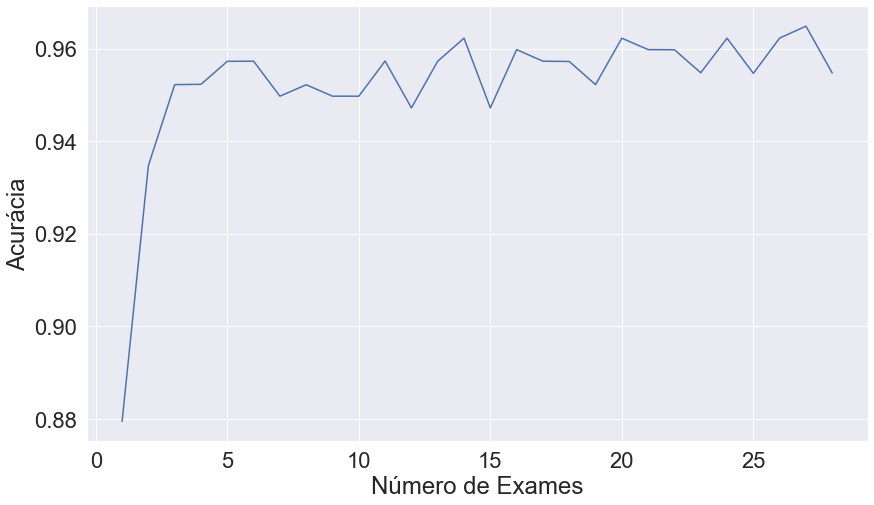

In [41]:
plt.figure(figsize = (14,8))
plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
plt.show()

In [42]:
from sklearn.feature_selection import RFE

SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_rfe, treino_y)

print('Valor da acurácia das Árvores é de {:.2f}%'.format(classificador.score(teste_rfe, teste_y)*100))

Valor da acurácia das Árvores é de 88.89%


In [43]:
valores_exames_v7 = teste_rfe = selecionador_rfe.transform(valores_exames_v6)

In [44]:
valores_exames_v7.shape

(569, 2)

<AxesSubplot:>

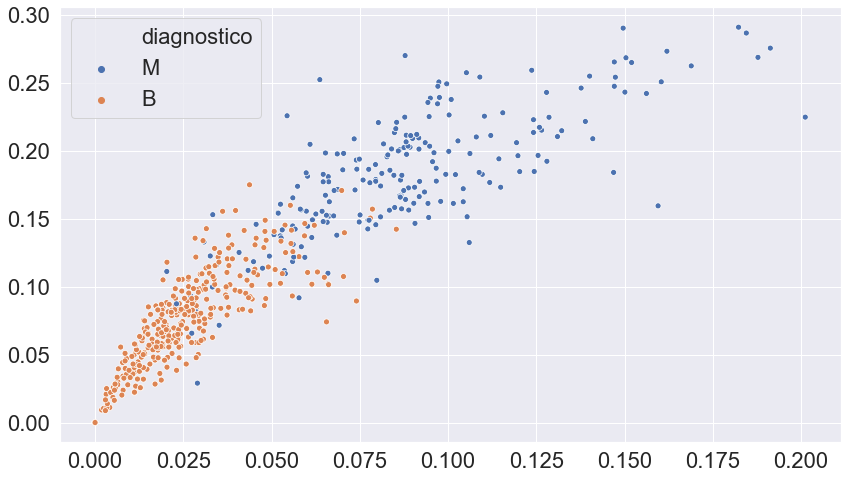

In [45]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

<AxesSubplot:>

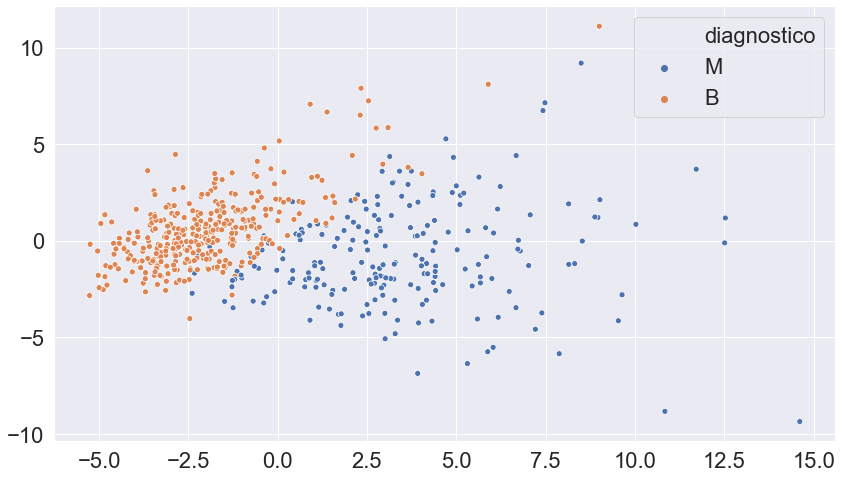

In [49]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

<AxesSubplot:>

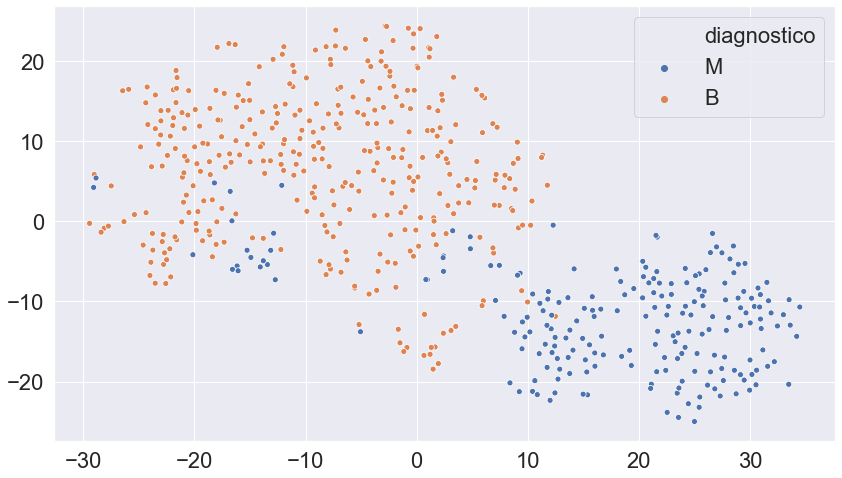

In [52]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)